In [1]:
%load_ext autoreload
%autoreload 2
import os
from pathlib import Path
if 'already_run' not in locals():
    os.chdir("../src")
    PROJECT_FOLDER = Path(os.getcwd()).parent
    already_run = True
else:
    print('Already run')

In [3]:
cfg_path = PROJECT_FOLDER/"api/configurations/cfg.yaml"

In [7]:
from data.database_configuration import DataBaseConfiguration

dbg = DataBaseConfiguration(cfg_path)

In [11]:
import pandas as pd

df = pd.read_parquet(dbg.db_dir)

In [12]:
df.head()

,date,bloomberg_ticker,open,high,low,close,adj_close,volume,currency,provider,created_at
0,2002-12-02,000720 KS,17240.287109,17240.287109,17240.287109,17240.287109,14663.353516,0.0,KRW,yahoo,2022-10-10 22:15:00.733372
1,2002-12-03,000720 KS,17647.537109,18190.539062,17557.037109,18100.039062,15394.597656,904053.0,KRW,yahoo,2022-10-10 22:15:00.733372
2,2002-12-04,000720 KS,17738.037109,17828.537109,17376.037109,17376.037109,14778.811523,546849.0,KRW,yahoo,2022-10-10 22:15:00.733372
3,2002-12-05,000720 KS,17285.537109,17557.037109,17240.287109,17376.037109,14778.811523,368374.0,KRW,yahoo,2022-10-10 22:15:00.733372
4,2002-12-06,000720 KS,17285.537109,17692.787109,17240.287109,17466.537109,14855.786133,373380.0,KRW,yahoo,2022-10-10 22:15:00.733372


In [13]:
# summary statistics 
df.describe()

,open,high,low,close,adj_close,volume
count,1.866704e+07,1.866704e+07,1.866704e+07,1.866704e+07,1.866704e+07,1.866704e+07
mean,4.048327e+03,4.323696e+03,4.192074e+03,4.046402e+03,2.280801e+04,1.070202e+07
std,5.205981e+04,6.587397e+04,6.453505e+04,5.203306e+04,4.409407e+06,6.169745e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.965425e+05,0.000000e+00
25%,1.619000e+01,1.646000e+01,1.592000e+01,1.619000e+01,1.285166e+01,1.606585e+05
50%,4.391323e+01,4.450000e+01,4.330000e+01,4.390000e+01,3.677338e+01,5.788000e+05
75%,3.947500e+02,4.000000e+02,3.890140e+02,3.944445e+02,3.157378e+02,2.016600e+06
max,6.427222e+06,1.180000e+07,1.150000e+07,6.427222e+06,1.971195e+09,4.954022e+11


In [14]:
# categorical features
df.describe(include=object).T

,count,unique,top,freq
bloomberg_ticker,18667039,5047,TSKB TI,5120
currency,18667039,26,USD,7336834
provider,18667039,1,yahoo,18667039


<AxesSubplot: >

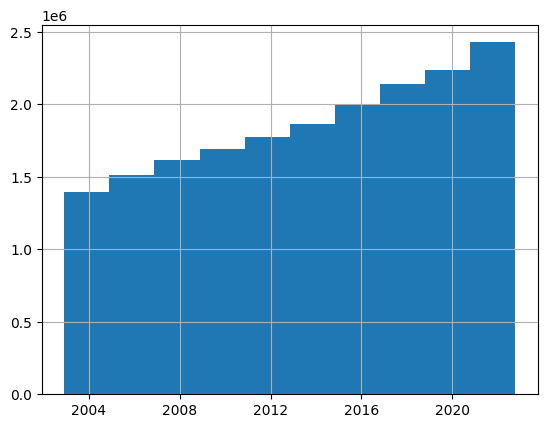

In [16]:
#dates
df.date.hist()

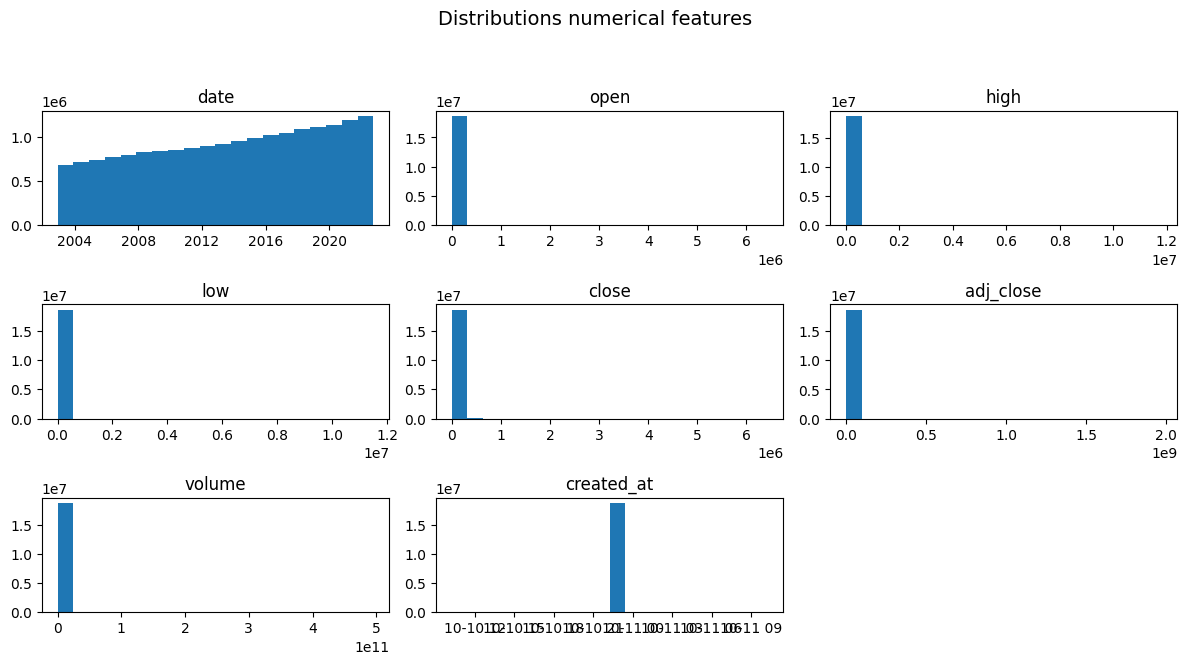

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
df.hist(figsize=(12, 30), bins=20, grid=False, layout=(15, 3))
#sns.despine()
plt.suptitle('Distributions numerical features', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])